In [ ]:
!pip install seaborn
!pip install wordcloud
!pip install gensim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# World Cups

In [2]:
wc = pd.read_csv('data/WorldCups_complete.csv', header=0, index_col='Unnamed: 0')
display(wc)

,Year,Country,Winner,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,70,13,18,590549
1,1934,Italy,Italy,70,16,17,363000
2,1938,France,Italy,84,15,18,375700
3,1950,Brazil,Uruguay,88,13,22,1045246
4,1954,Switzerland,Germany,140,16,26,768607
5,1958,Sweden,Brazil,126,16,35,819810
6,1962,Chile,Brazil,89,16,32,893172
7,1966,England,England,89,16,32,1563135
8,1970,Mexico,Brazil,95,16,32,1603975
9,1974,Germany,Germany,97,16,38,1865753


### Number of wins per country

{'Brazil': 5, 'Italy': 4, 'Germany': 4, 'Argentina': 3, 'Uruguay': 2, 'France': 2, 'England': 1, 'Spain': 1}


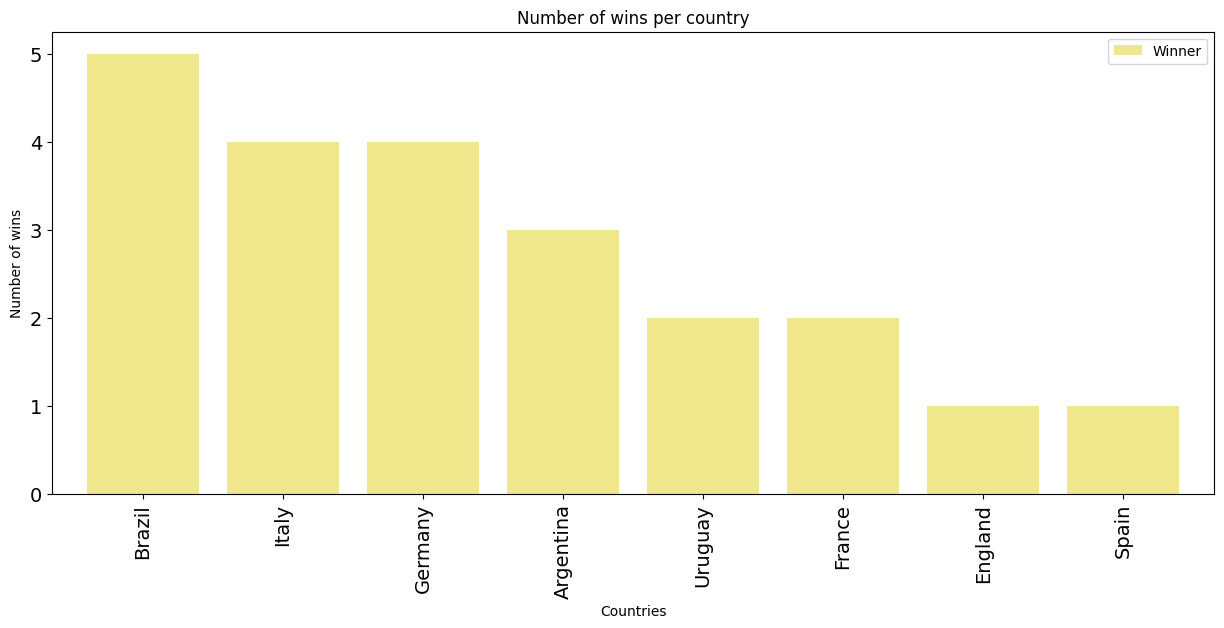

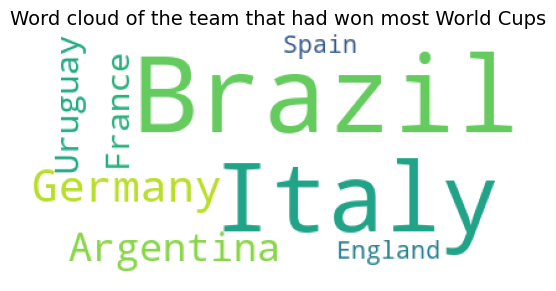

In [3]:
winner_count = pd.DataFrame.from_dict(wc["Winner"].value_counts())
winner_count.plot(y='Winner', kind="bar", color =['khaki'], figsize=(15, 6), fontsize=14, width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of wins')
plt.title('Number of wins per country')


#Produce a wordcloud
fig = plt.figure()
token_freq = (wc["Winner"].value_counts()).to_dict()
print(token_freq)
wordcloud = WordCloud(background_color = 'white', max_words=200).fit_words(token_freq)
plt.title('Word cloud of the team that had won most World Cups', fontsize=14)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Number of times a country was the host nation

([<matplotlib.axis.YTick at 0x7f30bc0898d0>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

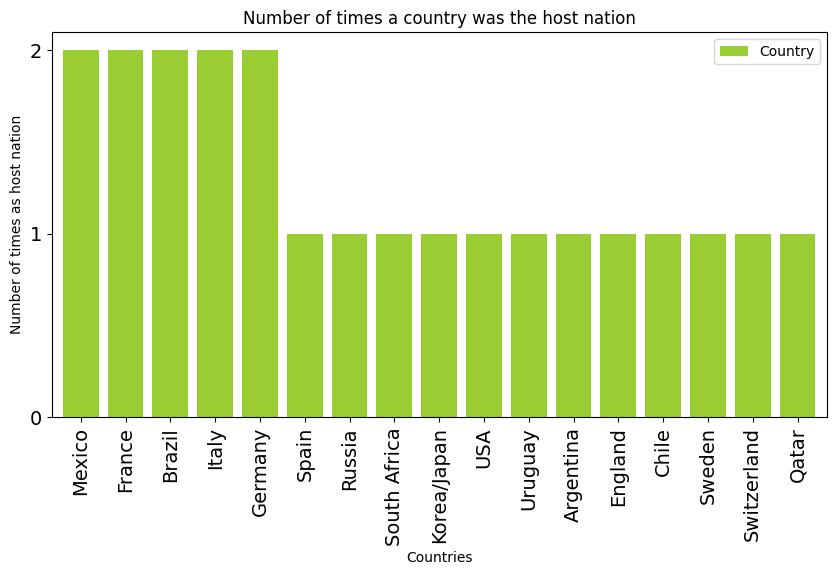

In [4]:
host_nation_count = pd.DataFrame.from_dict(wc["Country"].value_counts())

host_nation_count.plot(y='Country', kind="bar", color =['yellowgreen'], figsize=(10, 5), fontsize=14, width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of times as host nation')
plt.title('Number of times a country was the host nation')
plt.yticks([0,1,2])

### Countries that won the World Cup while was the host nation

In [5]:
host_nation = wc['Country'].to_list()
host_nation_win = []
for row in wc.iterrows():
    if row[1][1]==row[1][2]:
        host_nation_win.append('1')
    else:
        host_nation_win.append('0')

#print(host_nation)
#print(host_nation_win)
   
dictionary = dict.fromkeys(host_nation, 0) #initialize the dictionary with all values to zero

for i in range(0,len(wc)):
    win=0
    for j in dictionary:
        if wc['Country'][i]==j and wc['Country'][i]==wc['Winner'][i]:
            dictionary[j]=dictionary[j]+1
            win=1

        
print(dictionary)

{'Uruguay': 1, 'Italy': 1, 'France': 1, 'Brazil': 0, 'Switzerland': 0, 'Sweden': 0, 'Chile': 0, 'England': 1, 'Mexico': 0, 'Germany': 1, 'Argentina': 1, 'Spain': 0, 'USA': 0, 'Korea/Japan': 0, 'South Africa': 0, 'Russia': 0, 'Qatar': 0}


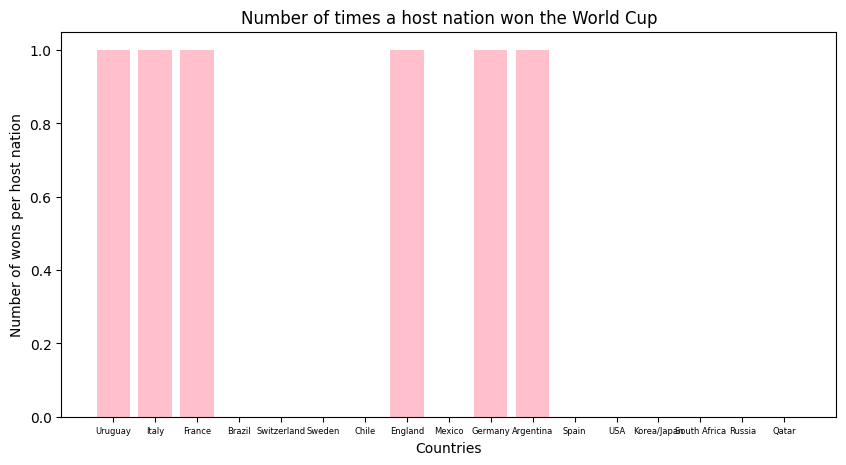

In [6]:
x = list(dictionary.keys())
y = list(dictionary.values())

plt.figure(figsize=(10, 5))
plt.bar(range(len(dictionary)), y, tick_label=x, color =['pink'], width=0.8, align='center')
plt.xticks(fontsize=6)
plt.xlabel('Countries')
plt.ylabel('Number of wons per host nation')
plt.title('Number of times a host nation won the World Cup')
plt.show()

### Number of qualified teams, matches, goals and attendance per World Cup

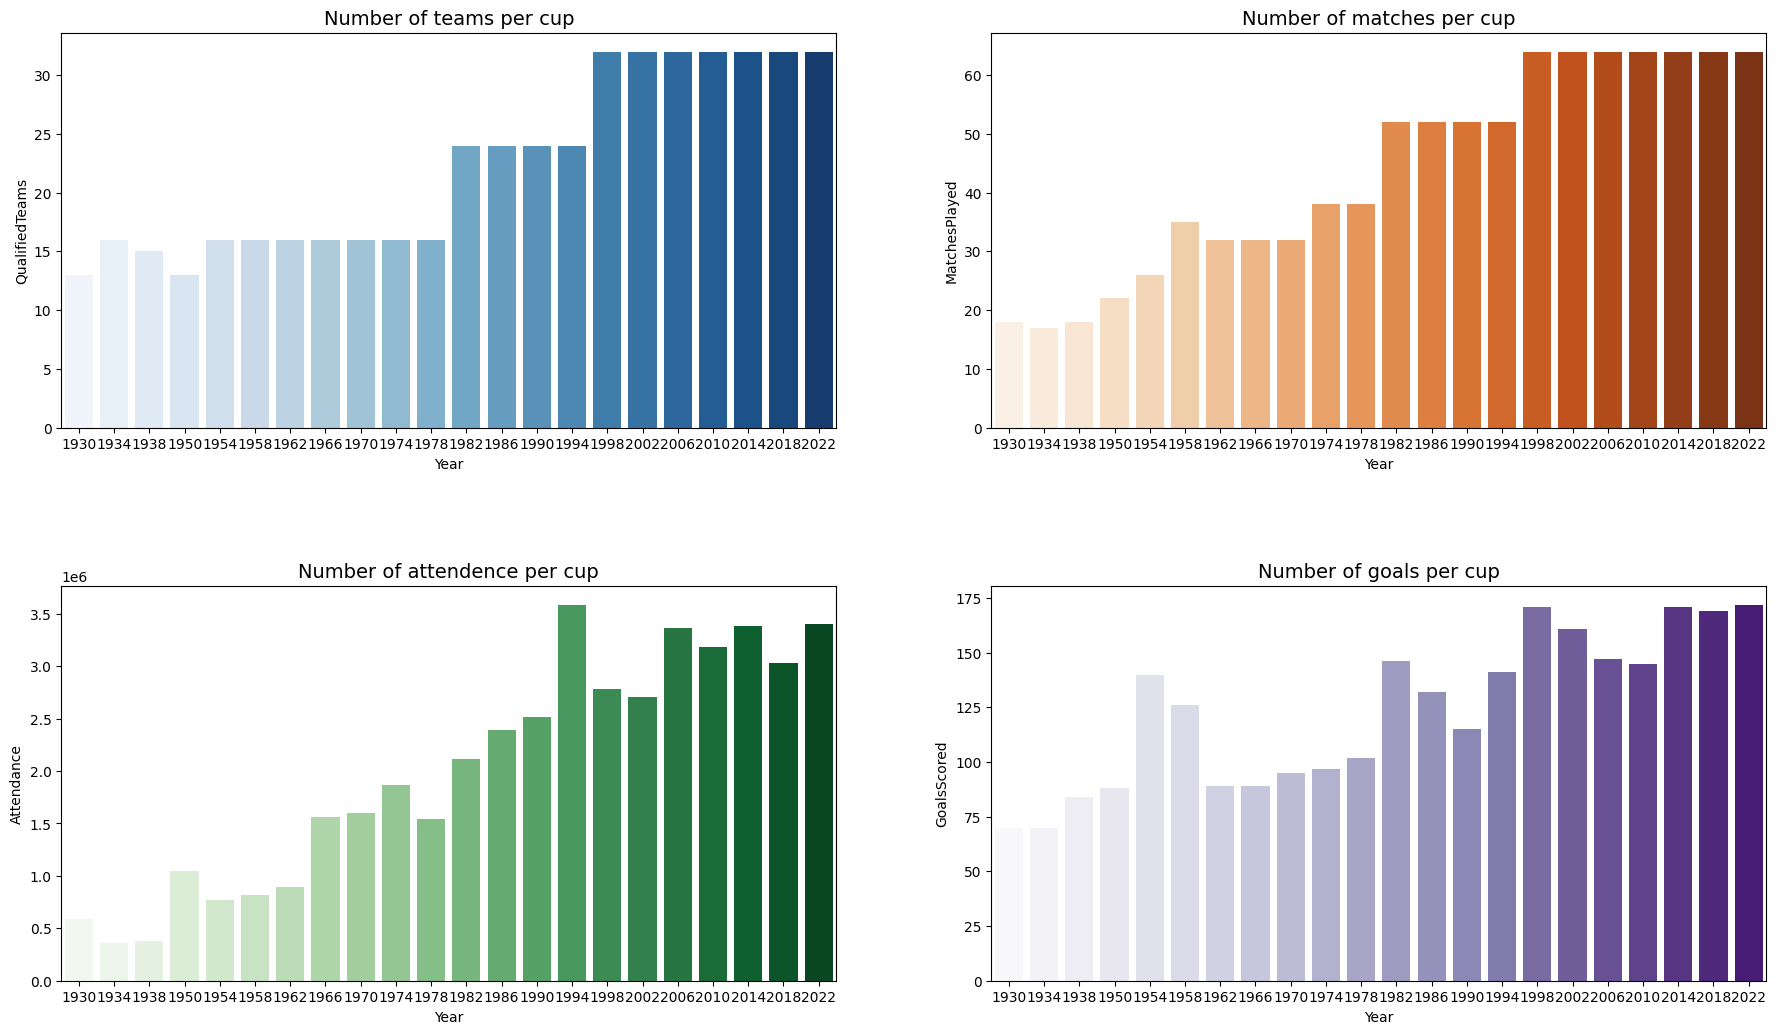

In [7]:
plt.figure(figsize = (22,12))

plt.subplot(221)
ax1 = sns.barplot(x="Year", y="QualifiedTeams", data=wc, palette="Blues")
ax1.set_title("Number of teams per cup", fontsize=14)

plt.subplot(222)
ax2 = sns.barplot(x="Year", y="MatchesPlayed", data=wc, palette="Oranges")
ax2.set_title("Number of matches per cup", fontsize=14)

plt.subplot(223)
ax3 = sns.barplot(x="Year", y="Attendance", data=wc, palette="Greens")
ax3.set_title("Number of attendence per cup", fontsize=14)

plt.subplot(224)
ax4 = sns.barplot(x="Year", y="GoalsScored", data=wc, palette="Purples")
ax4.set_title("Number of goals per cup", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

# World Cup Matches

In [8]:
df_wcm = pd.read_csv('data/WorldCupMatches_complete.csv',header=0, index_col='Unnamed: 0')
display(df_wcm)

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Match Winner
0,1930.0,France,4.0,1.0,Mexico,,4444.0,France
1,1930.0,USA,3.0,0.0,Belgium,,18346.0,USA
2,1930.0,Yugoslavia,2.0,1.0,Brazil,,24059.0,Yugoslavia
3,1930.0,Romania,3.0,1.0,Peru,,2549.0,Romania
4,1930.0,Argentina,1.0,0.0,France,,23409.0,Argentina
...,...,...,...,...,...,...,...,...
975,2022.0,England,1.0,2.0,France,,68895.0,France
976,2022.0,Argentina,3.0,0.0,Croatia,,88966.0,Argentina
977,2022.0,France,2.0,0.0,Morocco,,68294.0,France
978,2022.0,Croatia,2.0,1.0,Morocco,,44137.0,Croatia


### Number of goals per country

In [9]:
#Create a dictionary with the goals per country
ng={}

#Initialization of the dictionary
ng[df_wcm["Home Team Name"][0]]=df_wcm["Home Team Goals"][0]
ng[df_wcm["Away Team Name"][0]]=df_wcm["Away Team Goals"][0]

for i in range(1,len(df_wcm)):
    home=0
    away=0
    for j in ng:
        if df_wcm["Home Team Name"][i]==j:
            ng[j]=ng[j]+df_wcm["Home Team Goals"][i]
            home=1
        if df_wcm["Away Team Name"][i]==j:
            ng[j]=ng[j]+df_wcm["Away Team Goals"][i]
            away=1
            
    #countries not in the dictionary iet        
    if home==0:                                        
        ng[df_wcm["Home Team Name"][i]]=df_wcm["Home Team Goals"][i]
    if away==0:
        ng[df_wcm["Away Team Name"][i]]=df_wcm["Away Team Goals"][i]

In [10]:
#Reorder the dictionary to know the countries with more goals
ng_sorted={}

n=len(ng)

while len(ng_sorted)!=n: 
    m=max(ng.values())
    for i in ng:
        if ng[i]==m:
            ng_sorted[i]=ng[i]
            del ng[i]
            break

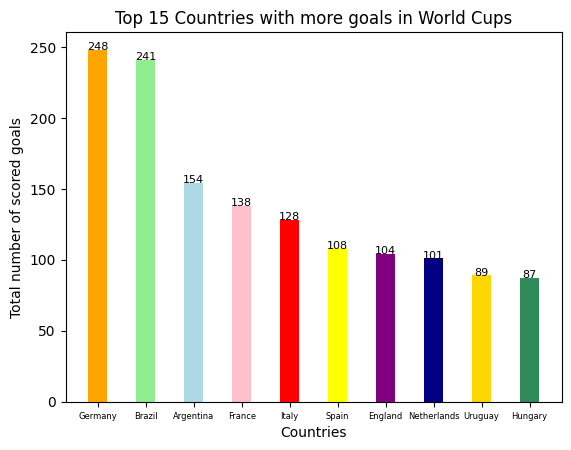

In [11]:
#Make a plot of the 15 countries with more goals
country=[]
counts=[]

idx=0

for i in ng_sorted:
    country.append(i)
    counts.append(ng_sorted[i])
    idx=idx+1
    
    if idx==10:
        break

c = ['orange', 'lightgreen', 'lightblue', 'pink', 'red', 'yellow','purple','navy','gold','seagreen']

plt.bar(country, counts, width=.4, color=c)
plt.xticks(fontsize=6)
plt.title("Top 15 Countries with more goals in World Cups")
plt.xlabel('Countries')
plt.ylabel('Total number of scored goals')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center', fontsize=8)
        
addlabels(country, counts)

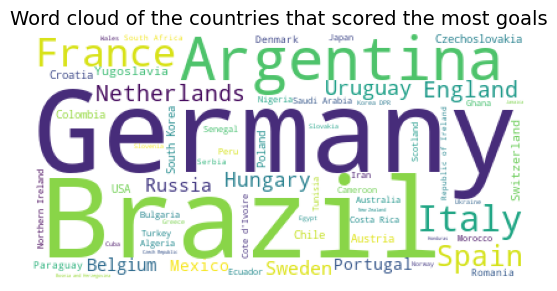

In [12]:
#Produce a wordcloud
fig = plt.figure()
token_freq = ng_sorted
wordcloud = WordCloud(background_color = 'white', max_words=200).fit_words(token_freq)
plt.title('Word cloud of the countries that scored the most goals', fontsize=14)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
 

### Number of wins per country

In [13]:
#Create a dictionary with the wins per country
nw={}

#Initialization of the dictionary
nw[df_wcm["Match Winner"][0]]=1

for i in range(1,len(df_wcm)):
    idx=0
    for j in nw:
        if df_wcm["Match Winner"][i]==j:
            nw[j]=nw[j]+1
            idx=1
        
            
    #countries not in the dictionary iet        
    if idx==0:                                        
        nw[df_wcm["Match Winner"][i]]=1
    

In [14]:
#Reorder the dictionary to know the countries with more wins
nw_sorted={}

n=len(nw)

while len(nw_sorted)!=n: 
    m=max(nw.values())
    for i in nw:
        if nw[i]==m:
            nw_sorted[i]=nw[i]
            del nw[i]
            break

del nw_sorted['tie']  #to remove the information of ties
print(nw_sorted)

{'Brazil': 81, 'Germany': 78, 'Argentina': 56, 'Italy': 46, 'France': 42, 'Netherlands': 34, 'Spain': 33, 'England': 33, 'Uruguay': 26, 'Belgium': 23, 'Sweden': 20, 'Russia': 19, 'Portugal': 18, 'Mexico': 17, 'Poland': 17, 'Croatia': 17, 'Yugoslavia': 16, 'Hungary': 15, 'Switzerland': 14, 'Austria': 12, 'Chile': 11, 'Czechoslovakia': 11, 'Colombia': 10, 'USA': 9, 'Denmark': 9, 'Romania': 8, 'Paraguay': 8, 'Costa Rica': 8, 'South Korea': 8, 'Japan': 7, 'Morocco': 6, 'Nigeria': 6, 'Turkey': 5, 'Peru': 5, 'Cameroon': 5, 'Senegal': 5, 'Ecuador': 5, 'Ghana': 5, 'Scotland': 4, 'Saudi Arabia': 4, 'Bulgaria': 4, 'Australia': 4, 'Northern Ireland': 3, 'Tunisia': 3, 'Algeria': 3, 'Republic of Ireland': 3, 'Iran': 3, 'Ukraine': 3, "Cote d'Ivoire": 3, 'Norway': 2, 'South Africa': 2, 'Greece': 2, 'Serbia': 2, 'Cuba': 1, 'Wales': 1, 'Korea DPR': 1, 'Jamaica': 1, 'Czech Republic': 1, 'Slovenia': 1, 'Slovakia': 1, 'Bosnia and Herzegovina': 1}


Text(0, 0.5, 'Total number of wins')

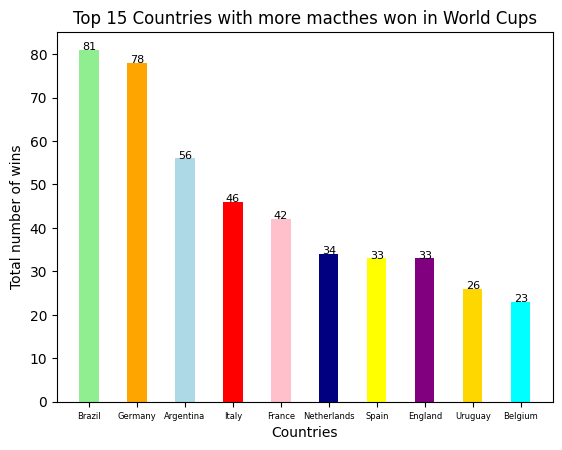

In [15]:
#Make a plot of the 15 countries with more wins
country=[]
counts=[]

idx=0

for i in nw_sorted:
    country.append(i)
    counts.append(nw_sorted[i])
    idx=idx+1
    
    if idx==10:
        break

c = ['lightgreen', 'orange', 'lightblue', 'red', 'pink', 'navy','yellow','purple','gold','cyan']

plt.bar(country, counts, width=.4, color=c)
plt.xticks(fontsize=6)
plt.title("Top 15 Countries with more macthes won in World Cups")
addlabels(country, counts)
plt.xlabel('Countries')
plt.ylabel('Total number of wins')

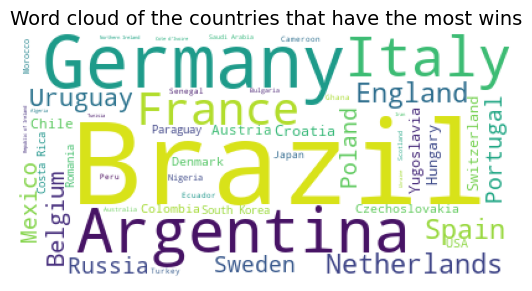

In [16]:
#Produce a wordcloud
fig = plt.figure()
token_freq = nw_sorted
wordcloud = WordCloud(background_color = 'white', max_words=200).fit_words(token_freq)
plt.title('Word cloud of the countries that have the most wins', fontsize=14)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Number of Matches per Country

In [17]:
home_teams = df_wcm['Home Team Name'].to_list()
away_teams = df_wcm['Away Team Name'].to_list()
teams = []
for i in home_teams:
    for j in away_teams:
        if i==j:
            teams.append(i)
        else:
            teams.append(j)
            
nm = dict.fromkeys(teams, 0) #initialize the dictionary with all values to zero
print(nm)

{'Mexico': 0, 'Belgium': 0, 'Brazil': 0, 'Peru': 0, 'France': 0, 'Bolivia': 0, 'Paraguay': 0, 'Romania': 0, 'Chile': 0, 'USA': 0, 'Yugoslavia': 0, 'Argentina': 0, 'Egypt': 0, 'Netherlands': 0, 'Switzerland': 0, 'Sweden': 0, 'Spain': 0, 'Hungary': 0, 'Austria': 0, 'Germany': 0, 'Czechoslovakia': 0, 'Indonesia': 0, 'Norway': 0, 'Poland': 0, 'Cuba': 0, 'Italy': 0, 'England': 0, 'Scotland': 0, 'Turkey': 0, 'South Korea': 0, 'Uruguay': 0, 'Wales': 0, 'Northern Ireland': 0, 'Russia': 0, 'Colombia': 0, 'Bulgaria': 0, 'Korea DPR': 0, 'Portugal': 0, 'Israel': 0, 'Morocco': 0, 'El Salvador': 0, 'Australia': 0, 'Haiti': 0, 'Zaire': 0, 'Iran': 0, 'Tunisia': 0, 'Cameroon': 0, 'New Zealand': 0, 'Algeria': 0, 'Honduras': 0, 'Kuwait': 0, 'Iraq': 0, 'Denmark': 0, 'Canada': 0, 'Republic of Ireland': 0, 'United Arab Emirates': 0, 'Costa Rica': 0, 'Saudi Arabia': 0, 'Greece': 0, 'Nigeria': 0, 'South Africa': 0, 'Japan': 0, 'Croatia': 0, 'Jamaica': 0, 'Senegal': 0, 'Slovenia': 0, 'Ecuador': 0, 'China PR': 

In [18]:
for i in range(0,len(df_wcm)):
    for j in nm:
        if df_wcm['Home Team Name'][i]==j or df_wcm['Away Team Name'][i]==j: #both options are considered
            nm[j]=nm[j]+1

                

import operator
nm_sorted = dict(sorted(nm.items(), key=operator.itemgetter(1),reverse=True))
print(nm_sorted)   

{'Germany': 121, 'Brazil': 118, 'Argentina': 92, 'Italy': 83, 'France': 75, 'England': 74, 'Spain': 67, 'Mexico': 61, 'Uruguay': 60, 'Netherlands': 59, 'Belgium': 53, 'Sweden': 51, 'Russia': 45, 'Switzerland': 42, 'USA': 38, 'Poland': 38, 'South Korea': 38, 'Yugoslavia': 37, 'Portugal': 35, 'Chile': 34, 'Hungary': 32, 'Czechoslovakia': 30, 'Croatia': 30, 'Austria': 29, 'Paraguay': 27, 'Bulgaria': 26, 'Cameroon': 26, 'Japan': 25, 'Colombia': 24, 'Scotland': 23, 'Morocco': 23, 'Denmark': 23, 'Costa Rica': 23, 'Nigeria': 22, 'Romania': 21, 'Australia': 20, 'Saudi Arabia': 19, 'Peru': 18, 'Iran': 18, 'Tunisia': 18, 'Ghana': 15, 'Algeria': 14, 'Northern Ireland': 13, 'Republic of Ireland': 13, 'Ecuador': 13, 'Senegal': 12, 'Greece': 11, 'Turkey': 10, 'Honduras': 9, 'South Africa': 9, "Cote d'Ivoire": 9, 'Serbia': 9, 'Norway': 8, 'Wales': 8, 'Egypt': 7, 'Korea DPR': 7, 'Bolivia': 6, 'El Salvador': 6, 'New Zealand': 6, 'Canada': 6, 'Slovenia': 6, 'Ukraine': 5, 'Slovakia': 4, 'Cuba': 3, 'Israe

Text(0, 0.5, 'Total number of matches played')

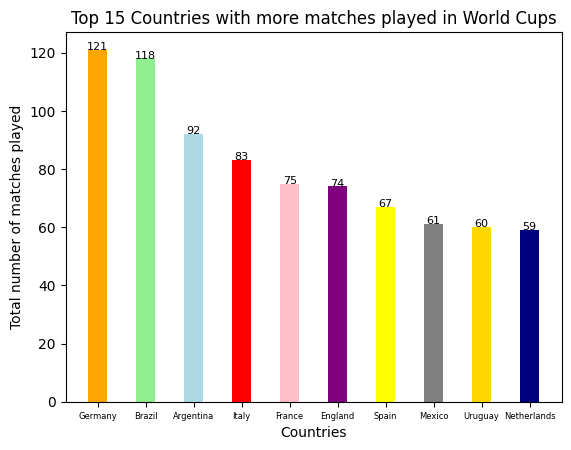

In [19]:
#Make a plot of the 15 countries with most matches played
country=[]
counts=[]

idx=0

for i in nm_sorted:
    country.append(i)
    counts.append(nm_sorted[i])
    idx=idx+1
    
    if idx==10:
        break

c = ['orange', 'lightgreen', 'lightblue', 'red', 'pink', 'purple','yellow','grey','gold','navy']

plt.bar(country, counts, width=.4, color=c)
plt.xticks(fontsize=6)
plt.title("Top 15 Countries with more matches played in World Cups")
addlabels(country, counts)
plt.xlabel('Countries')
plt.ylabel('Total number of matches played')

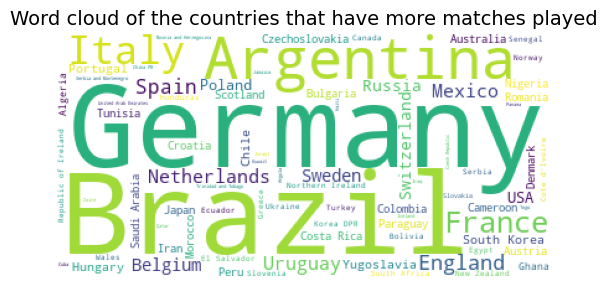

In [20]:
#Produce a wordcloud
fig = plt.figure()
token_freq = nm_sorted
wordcloud = WordCloud(background_color = 'white', max_words=200).fit_words(token_freq)
plt.title('Word cloud of the countries that have more matches played', fontsize=14)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Attendance per Country

In [21]:
na = dict.fromkeys(teams, 0) #initialize the dictionary with all values to zero
print(na)

{'Mexico': 0, 'Belgium': 0, 'Brazil': 0, 'Peru': 0, 'France': 0, 'Bolivia': 0, 'Paraguay': 0, 'Romania': 0, 'Chile': 0, 'USA': 0, 'Yugoslavia': 0, 'Argentina': 0, 'Egypt': 0, 'Netherlands': 0, 'Switzerland': 0, 'Sweden': 0, 'Spain': 0, 'Hungary': 0, 'Austria': 0, 'Germany': 0, 'Czechoslovakia': 0, 'Indonesia': 0, 'Norway': 0, 'Poland': 0, 'Cuba': 0, 'Italy': 0, 'England': 0, 'Scotland': 0, 'Turkey': 0, 'South Korea': 0, 'Uruguay': 0, 'Wales': 0, 'Northern Ireland': 0, 'Russia': 0, 'Colombia': 0, 'Bulgaria': 0, 'Korea DPR': 0, 'Portugal': 0, 'Israel': 0, 'Morocco': 0, 'El Salvador': 0, 'Australia': 0, 'Haiti': 0, 'Zaire': 0, 'Iran': 0, 'Tunisia': 0, 'Cameroon': 0, 'New Zealand': 0, 'Algeria': 0, 'Honduras': 0, 'Kuwait': 0, 'Iraq': 0, 'Denmark': 0, 'Canada': 0, 'Republic of Ireland': 0, 'United Arab Emirates': 0, 'Costa Rica': 0, 'Saudi Arabia': 0, 'Greece': 0, 'Nigeria': 0, 'South Africa': 0, 'Japan': 0, 'Croatia': 0, 'Jamaica': 0, 'Senegal': 0, 'Slovenia': 0, 'Ecuador': 0, 'China PR': 

In [22]:
for i in range(0,len(df_wcm)):
    for j in na:
        if df_wcm['Home Team Name'][i]==j or df_wcm['Away Team Name'][i]==j: #the attendance number of both options is counted
            if np.isnan(df_wcm['Attendance'][i])==True: #because there are some nan values in attendance column in the original dataset
                na[j]=na[j]
            else:
                na[j]=na[j]+df_wcm['Attendance'][i]

import operator
na_sorted = dict(sorted(na.items(), key=operator.itemgetter(1),reverse=True))
print(na_sorted) 

{'Brazil': 6467130.0, 'Germany': 6152669.0, 'Argentina': 5035142.0, 'Italy': 4209004.0, 'England': 3578773.0, 'France': 3562261.0, 'Netherlands': 3154399.0, 'Spain': 3035924.0, 'Mexico': 3014732.0, 'Uruguay': 2687448.0, 'Belgium': 2560984.0, 'Sweden': 2248430.0, 'Russia': 2065802.0, 'Switzerland': 1881064.0, 'Portugal': 1777983.0, 'South Korea': 1703165.0, 'USA': 1685029.0, 'Poland': 1552141.0, 'Croatia': 1467041.0, 'Chile': 1333656.0, 'Yugoslavia': 1318618.0, 'Cameroon': 1233367.0, 'Colombia': 1189254.0, 'Bulgaria': 1160335.0, 'Japan': 1100880.0, 'Saudi Arabia': 1076627.0, 'Costa Rica': 1073204.0, 'Nigeria': 1056851.0, 'Romania': 1023420.0, 'Austria': 993170.0, 'Denmark': 981153.0, 'Paraguay': 971335.0, 'Morocco': 899034.0, 'Czechoslovakia': 891114.0, 'Australia': 850576.0, 'Hungary': 850165.0, 'Scotland': 783776.0, 'Tunisia': 776154.0, 'Ghana': 767038.0, 'Iran': 709208.0, 'Ecuador': 706651.0, 'Republic of Ireland': 650601.0, 'Senegal': 536526.0, 'Peru': 529253.0, 'Greece': 510852.0, 

Text(0, 0.5, 'Total number of attendance')

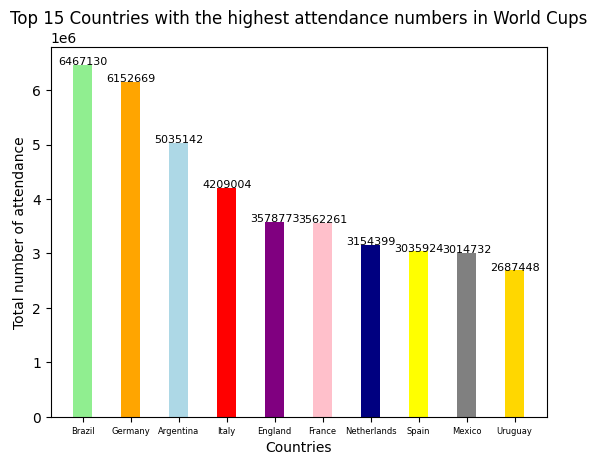

In [23]:
#Make a plot of the 15 countries with the hightest attendance numbers
country=[]
counts=[]

idx=0

for i in na_sorted:
    country.append(i)
    counts.append(na_sorted[i])
    idx=idx+1
    
    if idx==10:
        break

c = ['lightgreen', 'orange', 'lightblue', 'red', 'purple', 'pink','navy','yellow','grey','gold']

plt.bar(country, counts, width=.4, color=c)
plt.xticks(fontsize=6)
plt.title("Top 15 Countries with the highest attendance numbers in World Cups")
addlabels(country, counts)
plt.xlabel('Countries')
plt.ylabel('Total number of attendance')

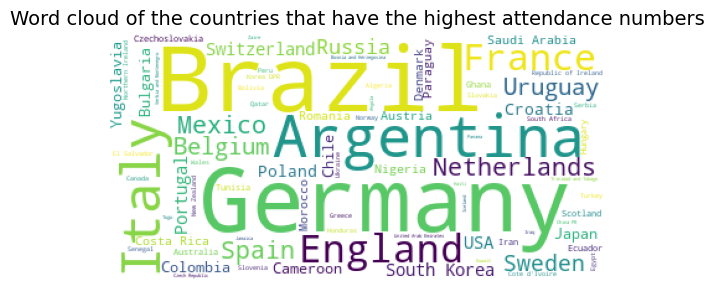

In [24]:
#Produce a wordcloud
fig = plt.figure()
token_freq = na_sorted
wordcloud = WordCloud(background_color = 'white', max_words=200).fit_words(token_freq)
plt.title('Word cloud of the countries that have the highest attendance numbers', fontsize=14)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
#Obtain the average number of attendance
for i in na_sorted:
    for j in nm_sorted:
        if i==j:
            na_sorted[i]=round(na_sorted[i]/nm_sorted[i],2)


import operator
naa_sorted = dict(sorted(na_sorted.items(), key=operator.itemgetter(1),reverse=True))
print(naa_sorted) 

{'El Salvador': 59290.33, 'Qatar': 58651.0, 'Saudi Arabia': 56664.58, 'Brazil': 54806.19, 'Argentina': 54729.8, "Cote d'Ivoire": 54649.11, 'Bosnia and Herzegovina': 54416.0, 'Ecuador': 54357.77, 'Serbia and Montenegro': 53666.67, 'Netherlands': 53464.39, 'Togo': 52666.67, 'Ukraine': 52000.0, 'Ghana': 51135.87, 'Germany': 50848.5, 'Portugal': 50799.51, 'Italy': 50710.89, 'Republic of Ireland': 50046.23, 'Trinidad and Tobago': 49986.33, 'Colombia': 49552.25, 'Mexico': 49421.84, 'Iraq': 49254.33, 'Czech Republic': 49000.0, 'Croatia': 48901.37, 'Norway': 48752.88, 'Romania': 48734.29, 'England': 48361.8, 'Belgium': 48320.45, 'Nigeria': 48038.68, 'France': 47496.81, 'Cameroon': 47437.19, 'Costa Rica': 46661.04, 'Greece': 46441.09, 'Russia': 45906.71, 'Spain': 45312.3, 'South Korea': 44820.13, 'Uruguay': 44790.8, 'Switzerland': 44787.24, 'Serbia': 44780.22, 'Senegal': 44710.5, 'Bulgaria': 44628.27, 'USA': 44342.87, 'Sweden': 44086.86, 'Japan': 44035.2, 'South Africa': 43366.56, 'United Arab 

Text(0, 0.5, 'Average number of attendance')

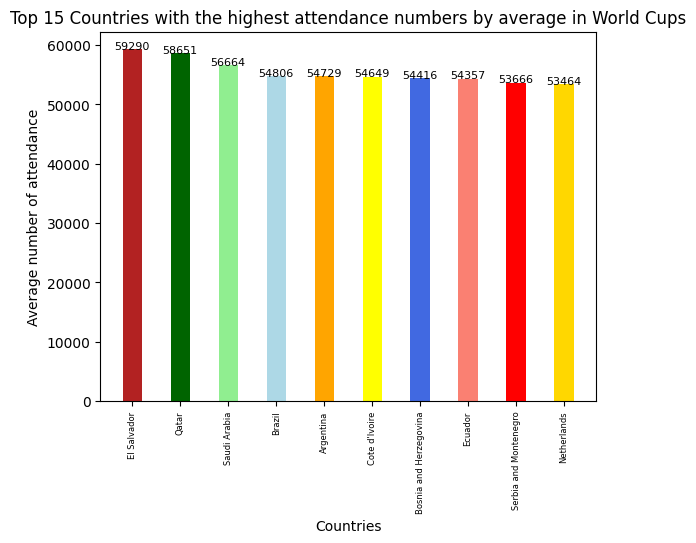

In [26]:
#Make a plot of the 15 countries with the hightest attendance numbers by average
country=[]
counts=[]

idx=0

for i in naa_sorted:
    country.append(i)
    counts.append(naa_sorted[i])
    idx=idx+1
    
    if idx==10:
        break

c = ['firebrick', 'darkgreen', 'lightgreen', 'lightblue', 'orange', 'yellow','royalblue','salmon','red','gold']

plt.bar(country, counts, width=.4, color=c)
plt.xticks(fontsize=6, rotation=90)
plt.title("Top 15 Countries with the highest attendance numbers by average in World Cups")
addlabels(country, counts)
plt.xlabel('Countries')
plt.ylabel('Average number of attendance')

---

## Which factor is more correlated with wins (influence most)?

We will check the correlation between Matches, Goals and Attendance of all World Cup editions (sum of all) on the wins, to know which one of these three factores can influence more in winning. 

In [27]:
df = pd.DataFrame(na.keys(), columns=['Country'])
display(df)

,Country
0,Mexico
1,Belgium
2,Brazil
3,Peru
4,France
...,...
77,Serbia
78,Bosnia and Herzegovina
79,Iceland
80,Panama


In [28]:
countries = df['Country'].to_list()

matches = []
for i in countries:
    for j in nm_sorted.keys():
        if i==j:
            matches.append(nm_sorted[i])
        
df['Matches']=matches 

goals = []
for i in countries:
    for j in ng_sorted.keys():
        if i==j:
            goals.append(ng_sorted[i])
        
df['Goals']=goals 

attendance = []
for i in countries:
    for j in na.keys():
        if i==j:
            attendance.append(na[i])
            
df['Attendance']=attendance 

wins = []
for i in countries:
    aux = 0
    for j in nw_sorted.keys():
        if i==j:
            wins.append(nw_sorted[i])
            aux = 1
    if aux==0:
        wins.append(0)
    
df['Wins']=wins

In [29]:
display(df)

,Country,Matches,Goals,Attendance,Wins
0,Mexico,61,63.0,3014732.0,17
1,Belgium,53,71.0,2560984.0,23
2,Brazil,118,241.0,6467130.0,81
3,Peru,18,21.0,529253.0,5
4,France,75,138.0,3562261.0,42
...,...,...,...,...,...
77,Serbia,9,9.0,403022.0,2
78,Bosnia and Herzegovina,3,4.0,163248.0,1
79,Iceland,3,2.0,128566.0,0
80,Panama,3,2.0,123744.0,0


In [30]:
x1 = df[df.columns[[1,]]]  #matches
x2 = df[df.columns[[2,]]]  #goals
x3 = df[df.columns[[3,]]]  #attendance

y = df[df.columns[-1]]

x1,x2,x3,y = np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [31]:
from scipy.stats import pearsonr

In [32]:
pearsonr(x1[:,0], y)

PearsonRResult(statistic=0.9633510970990586, pvalue=1.7668576049394043e-47)

In [33]:
pearsonr(x2[:, 0], y)

PearsonRResult(statistic=0.9894911364397938, pvalue=5.826711103445724e-69)

In [34]:
pearsonr(x3[:, 0], y)

PearsonRResult(statistic=0.974075728138142, pvalue=2.1036575275831305e-53)

Looking to the correlation coefficients:
- all of the variables are strongly correlated with wins 
- the goals is the variable that are more correlated with wins so, can also be understood as the variable that has more influence.